In [1]:
import numpy as np
from scipy import linalg
from copy import deepcopy
from matplotlib import image,pyplot as plt

In [2]:
## Implement modified Gram-Schmidt orthogonalization
## We will return the reduced QR rather than bother completing Q
def gram_schmidt(A):
    Q = deepcopy(A)
    (m,n) = Q.shape
    R = np.zeros((n,n))
    
    for i in range(n):
        # Calculate the norm and scale the vector
        R[i,i] = linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        
        # Remove the projection of that vector from each following vector
        for j in range(i+1,n):
            R[i,j] = Q[:,i].transpose()@Q[:,j]
            Q[:,j] = Q[:,j] - R[i,j]*Q[:,i]
            
    # reduce to just the square, exactly triangular part
    R = linalg.triu(R) 
    return (Q,R)

In [3]:
## Recreate qrfactor.m

def qrfactor(A):
    A = deepcopy(A)
    (m,n) = A.shape
    Q = np.eye(m)
    for k in range(n):
        # Find the HH reflector
        z = A[k:m,k]
        v = np.concatenate([ np.array([-np.sign(z[0])*linalg.norm(z) - z[0]]), -z[1:]])
        v = v/linalg.norm(v)
        
        # Apply the HH reflection to each column of A and Q
        for j in range(n):
            A[k:m,j] = A[k:m,j] - 2*v*(v.transpose()@A[k:m,j])
        for j in range(m):
            Q[k:m,j] = Q[k:m,j] - 2*v*(v.transpose()@Q[k:m,j])
    Q = Q.transpose()
    R = linalg.triu(A)
    return (Q,R)

Now we can look at how these different algorithms perform in terms of reproducing the original matrix M = QR

In [4]:
M = np.random.normal(size=(1000,100))

In [5]:
(Q,R)   = gram_schmidt(M)
(Q1,R1) = qrfactor(M)
(Q2,R2) = linalg.qr(M)
print((Q.shape,R.shape))
print((Q1.shape,R1.shape))
print((Q2.shape,R2.shape))

((1000, 100), (100, 100))
((1000, 1000), (1000, 100))
((1000, 1000), (1000, 100))


In [6]:
np.sum(np.abs(M - Q1@R1))

6.239089607568116e-11

In [7]:
np.sum(np.abs(M - Q2@R2))

3.923762417003306e-11

In [8]:
np.sum(np.abs(Q1 - Q2))

1.2209669984549797e-11

In [9]:
np.sum(np.abs(R1 -R2))

6.193794392303498e-12

In this question we see that by expanding the exponent we add a large number of subtractions. Subtraction is generally less well conditional than addition, since floating point numbers lose precision in the lower digits as the gain in absolute magnitude. Therefore the difference of two large numbers has at best the precision of the large numbers, which may be much very low if the two numbers are very close and have a small difference.

In [10]:
## Question 2

def bad_poly(x):
    return x**9-18*x**8+144*x**7-672*x**6+2016*x**5-4032*x**4+5376*x**3-4608*x**2+2304*x-512

def good_poly(x):
    return (x-2)**9

In [11]:
x = np.arange(1.92,2.08,0.001)
y_bad = [bad_poly(x) for x in x]
y_good = [good_poly(x) for x in x]

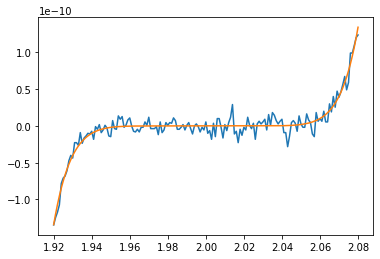

In [12]:
plt.plot(x,y_bad)
plt.plot(x,y_good)

In this question we examine the conditioning of random matrices. We find that for a fixed ratio of column-size to row-size the condition number rather quickly approaches an asymptote. However, if we hold either value fixed and let the two approach each other the condition number grows seemingly exponentially. In essence, the closer we get to square, the worse the condition number of a random matrix. For a fixed (small) difference, the condition number seems to grow linearly with size.

In [13]:
## Question 3

def rand_cond(size):
    (m,n) = size
    M = np.random.normal(size=size)
    U,S,Vh = linalg.svd(M)
    K = S[0]/S[n-1]
    return K

rand_cond((100,10))

1.5208344056347625

In [14]:
def mean_rand_cond(size,num_sim):
    K = [rand_cond(size) for i in range(num_sim)]
    mean_K = np.mean(K)
    sd_K = np.std(K)
    return mean_K,sd_K

mean_rand_cond((100,10),100)

(1.7318402389452832, 0.11174245423549564)

In [15]:
K_curve_fixed_ratio = np.array([mean_rand_cond((2*x,x),20) for x in range(10,100)])

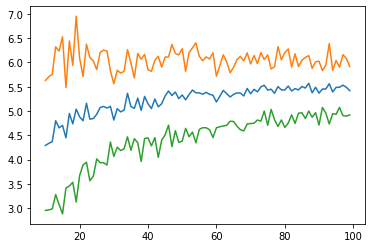

In [16]:
mean_Ks = K_curve_fixed_ratio[:,0]
sd_Ks = K_curve_fixed_ratio[:,1]
plt.plot(range(10,100),mean_Ks)
plt.plot(range(10,100),mean_Ks+1.96*sd_Ks)
plt.plot(range(10,100),mean_Ks-1.96*sd_Ks)

In [17]:
K_curve_fixed_m = np.array([mean_rand_cond((200,x),5) for x in range(1,200)])

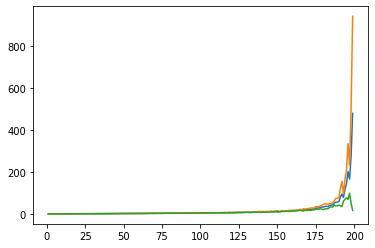

In [18]:
mean_Ks = K_curve_fixed_m[:,0]
sd_Ks = K_curve_fixed_m[:,1]
plt.plot(range(1,200),mean_Ks)
plt.plot(range(1,200),mean_Ks+1.96*sd_Ks)
plt.plot(range(1,200),mean_Ks-1.96*sd_Ks)

In [19]:
K_curve_fixed_n = np.array([mean_rand_cond((x,10),5) for x in range(11,200)])

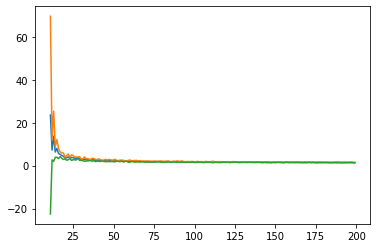

In [20]:
mean_Ks = K_curve_fixed_n[:,0]
sd_Ks = K_curve_fixed_n[:,1]
plt.plot(range(11,200),mean_Ks)
plt.plot(range(11,200),mean_Ks+1.96*sd_Ks)
plt.plot(range(11,200),mean_Ks-1.96*sd_Ks)

In [21]:
K_curve_fixed_diff = np.array([mean_rand_cond((x,x-1),100) for x in range(10,200)])

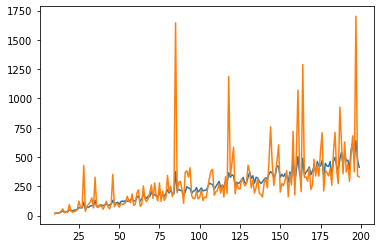

In [22]:
mean_Ks = K_curve_fixed_diff[:,0]
sd_Ks = K_curve_fixed_diff[:,1]
plt.plot(range(10,200),mean_Ks)
plt.plot(range(10,200),sd_Ks)
#plt.plot(range(10,200),mean_Ks+1.96*sd_Ks)
#plt.plot(range(10,200),mean_Ks-1.96*sd_Ks)

Finally, if we add a single repeat column to a nearly-square matrix we obtain an essentially infinite condition number and determinant. Perturbing this repeat column very quickly reduces the condition number back to reasonable sizes.

In [23]:
M = np.random.normal(size=(100,99))
U,S,Vh = linalg.svd(M)
K = S[0]/S[98]
K

163.18977056721351

In [24]:
col = M[:,0]
col.shape = (100,1)
new_M = np.concatenate((M,col),axis=1)
U,S,Vh = linalg.svd(new_M)
K = S[0]/S[99]
K

7.470464868067734e+16

In [25]:
linalg.det(new_M)

2.666528262275487e+62

In [26]:
def perturbed_K(M,eps):
    col = M[:,0] + eps*np.random.normal(size=(100,1))
    new_M = np.concatenate((M,col),axis=1)
    U,S,Vh = linalg.svd(new_M)
    K = S[0]/S[99]
    return K

def mean_perturbed_K(M,eps,num_sim):
    K = [perturbed_K(M,eps) for i in range(num_sim)]
    mean_K = np.mean(K)
    sd_K = np.std(K)
    return mean_K,sd_K

In [27]:
K_curve = np.array([mean_perturbed_K(M,eps,50) for eps in np.arange(0,0.1,0.001)])

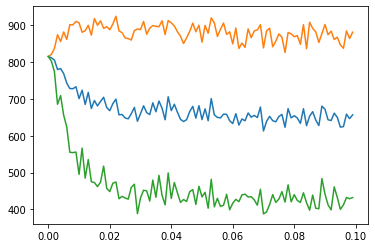

In [28]:
mean_Ks = K_curve[:,0]
sd_Ks = K_curve[:,1]
plt.plot(np.arange(0,0.1,0.001),mean_Ks)
plt.plot(np.arange(0,0.1,0.001),mean_Ks+1.96*sd_Ks)
plt.plot(np.arange(0,0.1,0.001),mean_Ks-1.96*sd_Ks)

In [29]:
np.arange(0,1,0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,